In [1]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('twitter.csv')

In [3]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [4]:
df['Type']=df['class'].map({0:'Hate Speech',1:'Offensive',2:'Neither'})

In [5]:
main=df[['tweet','Type']]

In [6]:
main

,tweet,Type
0,!!! RT @mayasolovely: As a woman you shouldn't...,Neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive
24779,"you've gone and broke the wrong heart baby, an...",Neither
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive
24781,youu got wild bitches tellin you lies,Offensive


In [7]:
import nltk

In [8]:
import re
import string

In [9]:
from nltk.corpus import stopwords

In [10]:
sts=set(stopwords.words("english"))

In [11]:
stemmer=nltk.SnowballStemmer("english")

In [12]:
def dataClean(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in sts]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [13]:
main['tweet']=main.tweet.apply(dataClean)

C:\Users\ARIN SINGLA\AppData\Local\Temp\ipykernel_10832\776522201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['tweet']=main.tweet.apply(dataClean)


In [14]:
main

,tweet,Type
0,rt mayasolov woman shouldnt complain clean ho...,Neither
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive
3,rt cganderson vivabas look like tranni,Offensive
4,rt shenikarobert shit hear might true might f...,Offensive
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive
24779,youv gone broke wrong heart babi drove redneck...,Neither
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive
24781,youu got wild bitch tellin lie,Offensive


In [15]:
X=np.array(main['tweet'])
y=np.array(main['Type'])

In [16]:
X

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [18]:
cv=CountVectorizer()
X=cv.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred=dt.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 147,   36,  282],
       [  26, 1112,  241],
       [ 227,  210, 5898]], dtype=int64)

In [24]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

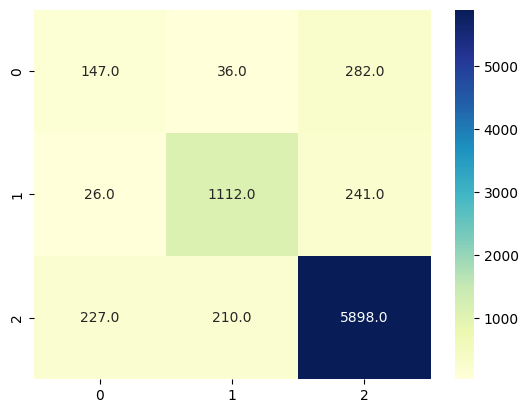

In [25]:
sns.heatmap(cm, annot=True, fmt='.1f',cmap='YlGnBu')

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred)

0.87504584912581

In [28]:
sample="Let's unite and kill all the people who are protesting against the government"
s=dataClean(sample)

In [29]:
s

'let unit kill peopl protest govern'

In [30]:
X_sample=cv.transform([s]).toarray()

In [31]:
X_sample

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
dt.predict(X_sample)

array(['Hate Speech'], dtype=object)